## Decision Trees
### Aufgabe 1

In [284]:
import numpy as np
import pandas as pd

In [285]:
# Data
data = {'Income': ["High", "High", "High", "Medium", "Low", "Low", "Low", "Medium", "Low", "Medium", "Medium", "Medium", "High", "Medium",  "Medium", "Low", "Low", "Low", "Medium", "High"], 
     'Student': ["No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No"], 
     'Age': ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40", "<=30", "<=30", "<=30", "31...40", ">40", "31...40"],
     'Credit_rating': ["Fair", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Fair", "Excellent", "Excellent"],
     'Buys_computer': ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "No", "Yes", "Yes", "Yes"]}
data_frame = pd.DataFrame(data)
data_frame

,Age,Buys_computer,Credit_rating,Income,Student
0,<=30,No,Fair,High,No
1,<=30,No,Excellent,High,No
2,31...40,Yes,Fair,High,No
3,>40,Yes,Fair,Medium,No
4,>40,Yes,Fair,Low,Yes
5,>40,No,Excellent,Low,Yes
6,31...40,Yes,Excellent,Low,Yes
7,<=30,No,Fair,Medium,No
8,<=30,Yes,Fair,Low,Yes
9,>40,Yes,Fair,Medium,Yes


In [286]:
# Entropy of buys_computer
# Entropy(12,8)
# = Entropy(0.6,0,4)
b_c = -(0.6*np.log2(0.6))-(0.4*np.log2(0.4))
b_c

0.9709505944546686

In [287]:
# Calculate the information gain of age

# age_over_fourty = (4,2)
a1 = -((4.0/6)*np.log2((4.0/6)))-((2.0/6)*np.log2((2.0/6)))

#age_under_thirty = (2,6)
a2 = -((2.0/8)*np.log2((2.0/8)))-((6.0/8)*np.log2((6.0/8)))

#age_inbetween = (6,0)
a3 = -((6.0/6)*np.log2((6.0/6)))-0

age_gain = b_c - ((6.0/20*a1)+(8.0/20*a2)+(6.0/20*a3))
print("Age: ", age_gain)

('Age: ', 0.3709505944546686)


In [288]:
# Calculate the information gain of income

# high = (3,2)
a1 = -((3.0/5)*np.log2((3.0/5)))-((2.0/5)*np.log2((2.0/5)))

#medium = (5,3)
a2 = -((5.0/8)*np.log2((5.0/8)))-((3.0/8)*np.log2((3.0/8)))

#low = (4,3)
a3 = -((4.0/7)*np.log2((4.0/7)))-((3.0/7)*np.log2((3.0/7)))

income_gain = b_c - ((5.0/20*a1)+(8.0/20*a2)+(7.0/20*a3))
print("Income: ", income_gain)

('Income: ', 0.0016094970590274649)


In [289]:
# Calculate the information gain of credit

#excellent = (5,5)
a1 = -((5.0/10)*np.log2((5.0/10)))-((5.0/10)*np.log2((5.0/10)))

#fair = (7,3)
a2 = -((7.0/10)*np.log2((7.0/10)))-((3.0/10)*np.log2((3.0/10)))

credit_gain = b_c - ((10.0/20*a1)+(10.0/20*a2))
print("Credit: ", credit_gain)

('Credit: ', 0.03030514483932223)


In [290]:
# Calculate the information gain of student or not

#student = (8,1)
a1 = -((8.0/9)*np.log2((8.0/9)))-((1.0/9)*np.log2((1.0/9)))

#no student = (4,7)
a2 = -((4.0/11)*np.log2((4.0/11)))-((7.0/11)*np.log2((7.0/11)))

student_gain = b_c - ((9.0/20*a1)+(11.0/20*a2))
print("Student: ", student_gain)

('Student: ', 0.22437117627527592)


The biggest information gain can be achieved with Age. (Age>Student>Credit>Income)

### Aufgabe 2
#### Compare with sklearn

In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [292]:
data_frame['Age'] = data_frame.Age.astype("category").cat.codes
data_frame['Student'] = data_frame.Student.astype("category").cat.codes
data_frame['Credit_rating'] = data_frame.Credit_rating.astype("category").cat.codes
data_frame['Income'] = data_frame.Income.astype("category").cat.codes
data_frame['Buys_computer'] = data_frame.Buys_computer.astype("category").cat.codes

In [293]:
feature_cols = ['Age', 'Student', 'Credit_rating', 'Income']
X = data_frame[feature_cols]
y = data_frame.Buys_computer

In [294]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

export_graphviz(
         tree,
         out_file="tree.dot",
         feature_names=['Age', 'Student', 'Credit_rating', 'Income'] ,
         class_names='Buys_computer',
         rounded=True,
         filled=True
)

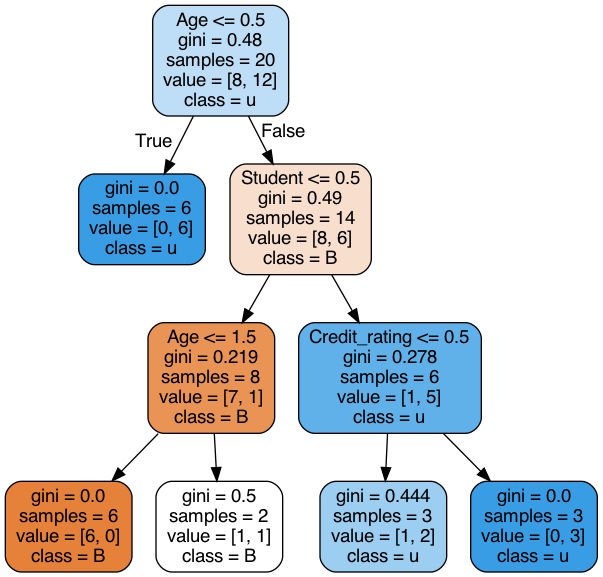

In [296]:
from IPython.display import Image
Image("tree.png", width=500, height=500)

The tree from sklearn also gets Age as the first attribute and Student and Credit_rating as the second and third. However the tree generated by SciKit Learn is binary, meaning it's either one or the other, while the one